# Исследование объявлений о продаже квартир

## Описание проекта

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных: 

airports_nearest — расстояние до ближайшего аэропорта в метрах (м);  
balcony — число балконов;  
ceiling_height — высота потолков (м);  
cityCenters_nearest — расстояние до центра города (м);  
days_exposition — сколько дней было размещено объявление (от публикации до снятия);  
first_day_exposition — дата публикации;  
floor — этаж;  
floors_total — всего этажей в доме;  
is_apartment — апартаменты (булев тип);  
kitchen_area — площадь кухни в квадратных метрах (м²);  
last_price — цена на момент снятия с публикации;  
living_area — жилая площадь в квадратных метрах(м²);  
locality_name — название населённого пункта;  
open_plan — свободная планировка (булев тип);  
parks_around3000 — число парков в радиусе 3 км;  
parks_nearest — расстояние до ближайшего парка (м);  
ponds_around3000 — число водоёмов в радиусе 3 км;  
ponds_nearest — расстояние до ближайшего водоёма (м);  
rooms — число комнат;  
studio — квартира-студия (булев тип);  
total_area — площадь квартиры в квадратных метрах (м²);  
total_images — число фотографий квартиры в объявлении.

Необходимо научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры, что позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

Исходя из поставленной задачи разделим исследование на несколько частей:

[Часть 1. Изучение общей информации](#1.)  
[Часть 2. Предобработка данных](#2.)  
[Часть 3. Добавление данных в исходную таблицу](#3.)  
[Часть 4. Исследовательский анализ данных](#4.)   
* [4.1. Изучение параметров: площадь, цена, число комнат, высота потолков](#4.1.)  
* [4.2. Изучение времени продажи квартиры](#4.2.)
* [4.3. Работа с аномальными значениями](#4.3.)
* [4.4. Факторы, влияющие на стоимость квартиры](#4.4.)  
* [4.5. 10 населённых пунктов с наибольшим числом объявлений](#4.5.)  
* [4.6. Анализ сегмента квартир в центре города](#4.6.)  

По итогу проведения исследования сделаем [общий вывод](#5.), в котором опишем ряд параметров, определяющих рыночную стоимость недвижимости и позволяющих построить автоматизированную систему.

### Часть 1. Изучение общей информации <a id='1.'></a> 

В данной части исследования загрузим необходимые библиотеки и посмотрим более детально на исходные данные.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Прочитаем файл csv, разобьем данные по колонкам, сохраним результат в датафрейм
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 

# Выведем на экран 5 первых строк датафрейма 
df.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изучим общую информацию о датафрейме и всем признакам и их типам, воспользовавшись методом info.

In [3]:
# Посмотрим общую информацию о датафрейме методом info()
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Рассмотрим основные статистические характеристики данных отдельно по каждому числовому и нечисловому признакам при помощи метода describe().

In [4]:
# Посмотрим на основные статистические характеристики данных
df.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
# Посмотрим статистику по нечисловым признакам
df.describe(include=['object', 'bool']) 

,first_day_exposition,is_apartment,studio,open_plan,locality_name
count,23699,2775,23699,23699,23650
unique,1491,2,2,2,364
top,2018-02-01T00:00:00,False,False,False,Санкт-Петербург
freq,368,2725,23550,23632,15721


In [6]:
# Проверим данные на наличие дубликатов
print('Количество дубликатов в данных:', df.duplicated().sum()) 

Количество дубликатов в данных: 0


Данная таблица представлена строками, в каждой из которых содержится информация об одном объекте недвижимости, выставленном на продажу, и столбцами - каждый из них задает определенную характеристику объекту.

Данные содержат значительное количество пропусков, которые находятся в столбцах: высота потолков, жилая площадь, площадь кухни, наличие балконов, расстояние до центра, аэропорта, ближайшего парка, водоёма и пр. Также, присутствуют пропуски в таком параметре, как - апартаменты. В дальнейших шагах исследования будет принято решение о замене или удалении отсутствующих значений.

Также, были обнаружены следующие аномалии - высота потолков 1 и 100 (м), жилая площадь - 2 (м²), площадь кухни - 1,3 и 112(м²). Такие значения будем считать выбросами и в дальнешем избавимся от них.

Дубликатов в исходных данных обнаружено не было.

### Часть 2. Предобработка данных <a id='2.'></a> 

Данную часть исследования посвятим предобработке исходных данных: для некоторых пропущенных значений постараемся найти логичную замену и заполним пропуски значениями, а также приведем данные к нужным типам там, где это будет необходимо.  

Начнем с рассмотрения доли пропусков в исходных данных и поработаем с ними.

In [7]:
df.isna().mean() # Проверим данные на наличие пропусков

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

В параметре "высота потолков" наблюдаем почти 40% пропусков - это довольно высокий показатель и удалять такие строки нецелесообразно. Заменим пропущенные значения на те, что встречаются чаще всего - моду.

In [8]:
# Заменим пропущенные значения модой
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mode()[0])

# Проверим количество пропущенных значений после замены
df['ceiling_height'].isna().value_counts() 

False    23699
Name: ceiling_height, dtype: int64

Менее 1% пропусков приходится на "общее количество этажей" - такие строки удалим из исходных данных. 

In [9]:
# Удалим все строки с пропущенными значениями в "общем количестве этажей в доме"
df.dropna(subset=['floors_total'], inplace=True) 

# Проверим количество пропущенных значений после замены
df['floors_total'].isna().value_counts() 

False    23613
Name: floors_total, dtype: int64

Исходя из предположения, что для квартир-студий характерно отсутствие внутренних перегородок между кухней и жилыми комнатами или комнатой - пропуски в "площади кухни" (10%) - заменим на нулевые значения, а пропуски в "жилой площади" (8%) - приравняем к общей. Строки с пропусками, не удовлетворяющими данному условию, удалим для достижения целей исследования.

In [10]:
# Заменим часть пропусков в "жилой площади" данными "общей площади"
df.loc[df['studio'] == True, 'living_area'] = df['total_area']

# Удалим оставшиеся строки с пропущенными значениями в "жилой площади"
df.dropna(subset=['living_area'], inplace = True) 

# Проверим количество пропущенных значений после замены
df['living_area'].isna().value_counts()

False    21750
Name: living_area, dtype: int64

In [11]:
# Заменим часть пропусков в "площади кухни" на нулевое значение
df.loc[df['studio'] == True, 'kitchen_area'] = 0 

# Удалим оставшиеся строки с пропущенными значениями в "площади кухни"
df.dropna(subset=['kitchen_area'], inplace = True) 

# Проверим количество пропущенных значений после замены
df['kitchen_area'].isna().value_counts() 

False    21089
Name: kitchen_area, dtype: int64

Предположим, что пропуски в количестве балконов (49%) появились по причине их отсутствия. Логичным будет заменить их на нулевые значения. В исследовании данная характеристика нам не потребуется, но замену сделаем для большей наглядности данных.

In [12]:
# Заполним пропущенные данные в столбце "число балконов"
df['balcony'] = df['balcony'].fillna('0') 

# Проверим количество пропущенных значений после замены
df['balcony'].isna().value_counts() 

False    21089
Name: balcony, dtype: int64

В "названиях населенных пунктов" пропущено около 0,2%. Эти данные будут в дальнейшем использованы в нашем исследовании и их незначительное количество позволяет избавится от них.

In [13]:
# Удалим строки с пропущенными значениями в "названии населенного пункта"
df.dropna(subset=['locality_name'], inplace=True) 

# Проверим количество пропущенных значений после замены
df['locality_name'].isna().value_counts() 

False    21051
Name: locality_name, dtype: int64

Отсутствующие значения в показателях объектов недвижимости: "число водоёмов и парков в радиусе 3 км" - в дальнейшием исследовании не будут применены, но для большего визуального и целостного восприятия информации из таблицы - заменим их на нулевые значения.

In [14]:
# Заполним пропущенные значения "числа парков в радиусе 3 км" на нулевое значение
df['parks_around3000'] = df['parks_around3000'].fillna('0')

# Проверим количество пропущенных значений после замены
df['parks_around3000'].isna().value_counts() 

False    21051
Name: parks_around3000, dtype: int64

In [15]:
# Заполним пропущенные значения "числа водоемов в радиусе 3 км" на нулевое значение
df['ponds_around3000'] = df['ponds_around3000'].fillna('0')

# Проверим количество пропущенных значений после замены
df['ponds_around3000'].isna().value_counts() 

False    21051
Name: ponds_around3000, dtype: int64

Показатель "количество дней публикации объявления" о продаже объекта содержит - 13% пропусков. Заменим их на медианное значение с целью дальнейшего применения в исследовании.

In [16]:
# Заменим пропущенные значения на медианные
df.loc[df['days_exposition'].isna(), 'days_exposition'] = df['days_exposition'].median()

# Проверим количество пропущенных значений после замены
df['days_exposition'].isna().value_counts() 

False    21051
Name: days_exposition, dtype: int64

Остальные характиристики объектов с пропущенными значениями - оставим без изменений и посмотрим на результат работы над пропускам.

In [17]:
# Проверим наличие пропусков после выполненных замен
df.isna().mean() 

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.000000
floor                   0.000000
is_apartment            0.879341
studio                  0.000000
open_plan               0.000000
kitchen_area            0.000000
balcony                 0.000000
locality_name           0.000000
airports_nearest        0.224217
cityCenters_nearest     0.223220
parks_around3000        0.000000
parks_nearest           0.655076
ponds_around3000        0.000000
ponds_nearest           0.614793
days_exposition         0.000000
dtype: float64

Использование дробных значений в таких характиристиках, как количество этажей в доме, количество балконов и количество дней публикации объявлений усложняет дальнейшую работу с данными - в этих столбцах тип данных изменим на целочислнный.  
Также, нам вряд ли пригодится информация о стоимости квартиры на момент ее снятия с публикации с точностью до копеек - тип этих данных также заменим на целочисленный.  
Значения столбца "дата публикации" переведем из строкового в формат даты.

In [18]:
# Приведем "число балконов" к целому числу
df['balcony'] = df['balcony'].astype('int') 

# Избавимся от копеек в "цене на момент снятия с публикации" 
df['last_price'] = df['last_price'].astype('int') 

# Приведем "общее количество этажей в доме" к целому числу
df['floors_total'] = df['floors_total'].astype('int') 

# Приведем "количество дней публикации" к целому числу
df['days_exposition'] = df['days_exposition'].astype('int') 

# Переведем значения в стобце в формат даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

### Часть 3. Добавление данных  в исходную таблицу <a id='3.'></a> 

Для проведения исследования объявлений о продаже объектов недвижимости расчитаем и добавим в исходные данные: 
* стоимость квадратного метра жилья; 
* день/месяц/год публикации; 
* принадлежность этажа квартиры к "первому"/"последнему"/"другому";
* соотношение жилой и общей площади и площади кухни к общей.

In [19]:
# Добавим в данные "цену за квадратный метр жилья"
df['sqm_price'] = df['last_price'] / df['total_area'] 

# Приведем стоимость за "квадратный метр" к целому числу
df['sqm_price'] = df['sqm_price'].astype('int') 

In [20]:
# Добавим в данные "день недели публикации"
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

 # Добавим в данные "месяц публикации"
df['month_exposition'] = df['first_day_exposition'].dt.month

# Добавим в данные "год публикации"
df['year_exposition'] = df['first_day_exposition'].dt.year 

In [21]:
# Добавим столбец с распределением этажей на "Первый", "Последний", "Другой" 
df['floor_status'] = np.where(df['floor'] == df['floors_total'], 'последний',
                     np.where(df['floor'] == 1, 'первый', 'другой'))

In [22]:
# Добавим к таблице соотношение жилой и общей площади
df['living_ratio'] = (df['living_area'] / df['total_area']) 

# Добавим к таблице соотношение площади кухни к общей площади квартиры
df['kitchen__ratio'] = (df['kitchen_area'] / df['total_area']) 

# Выведем первые 5 строк обновленного датафрейма
df.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,floor_status,living_ratio,kitchen__ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2,755.0,102,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.50,11,18.6,1,NaN,...,0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.50,5,34.3,4,NaN,...,2,574.0,558,92785,3,8,2015,другой,0.612500,0.148214
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1,48.0,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,2.50,12,14.4,5,NaN,...,0,NaN,55,95065,0,9,2018,другой,0.473684,0.299342


### Часть 4. Исследовательский анализ данных <a id='4.'></a> 

#### 4.1. Изучение параметров: площадь, цена, число комнат, высота потолков <a id='4.1.'></a> 

Начнем исследовательский анализ с изучения следующих параметров: площадь, цена, число комнат, высота потолков и для большей наглядности построим гистограммы для каждого параметра с помощью цикла.

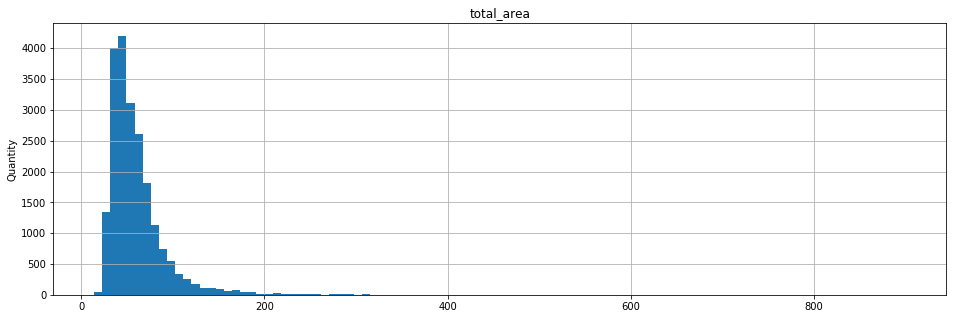

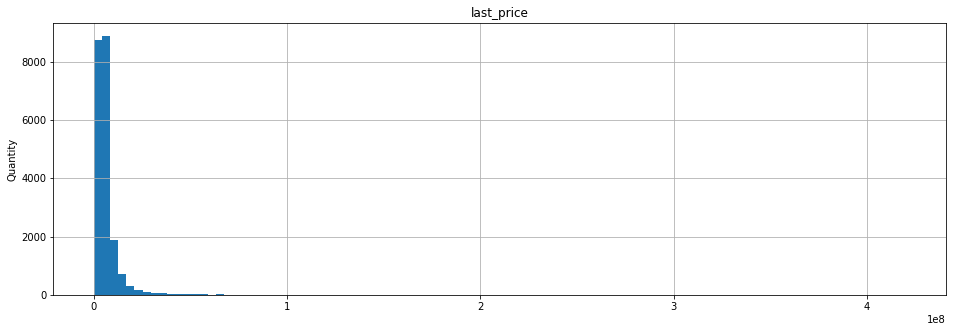

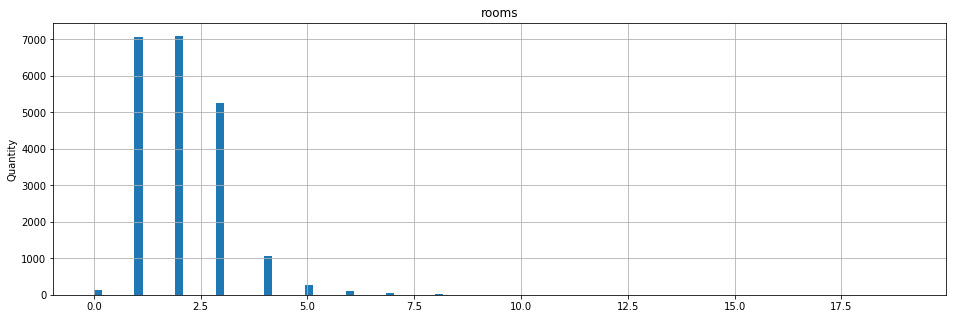

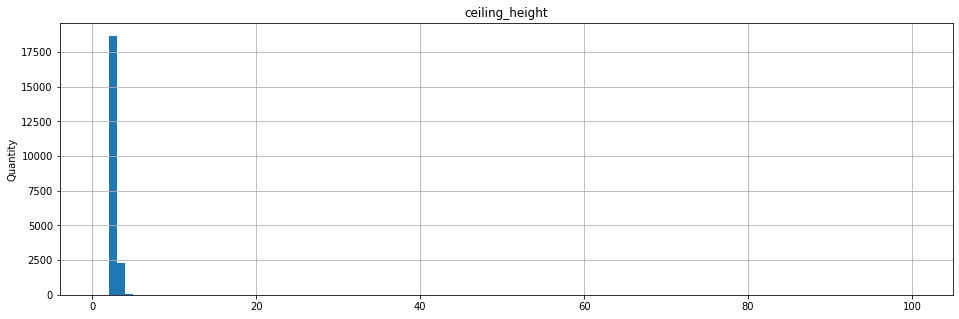

In [23]:
# Зададим переменную для исследуемых параметров
column_hist = ['total_area','last_price','rooms', 'ceiling_height']

# Построим гистограммы
for i in column_hist:
    plt.figure(figsize=(16, 5))
    plt.hist(df[i], bins=100)
    plt.title(i)
    plt.ylabel('Quantity')
    plt.grid()
    plt.show()

Из построенных графиков видно, как часто то или иное значение встречается в данных, а также редкие значения, например, такие как: общая площадь около 900 кв.м., высота потолков - 100 м. или количество комнат - 19.  
Рассмотрим далее аномальные значения более подробно при помощи диаграмм размаха и определим выбросы от которых в рамках исследования избавимся.

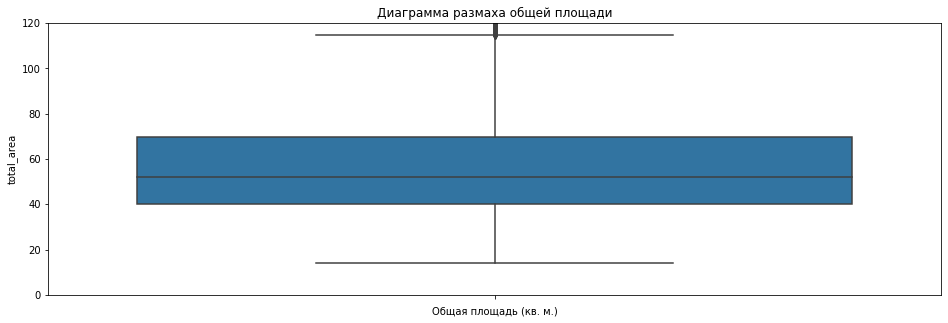

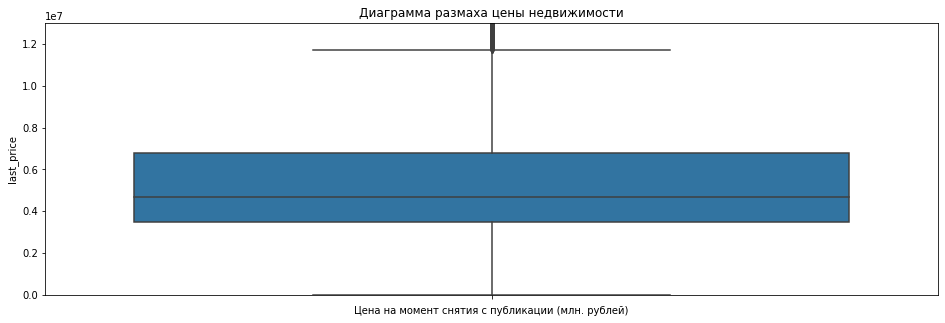

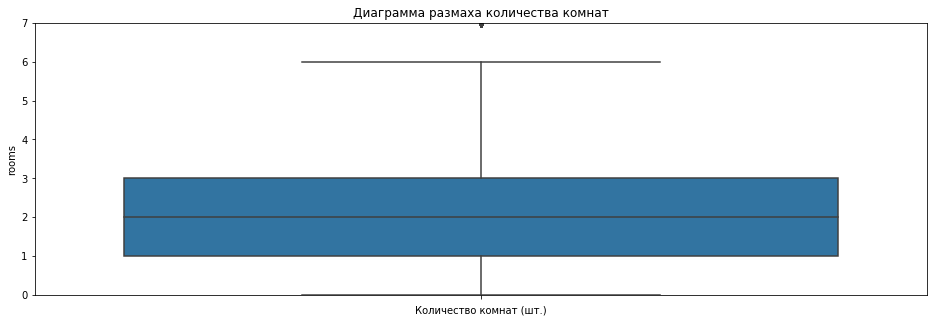

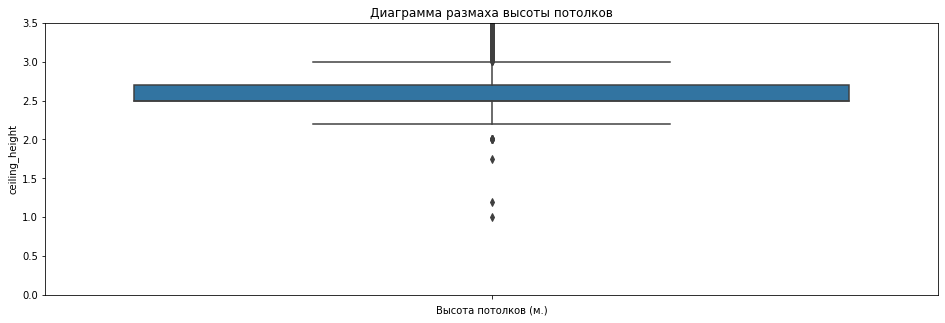

In [24]:
# Построим диаграмму размаха для общей площади
plt.figure(figsize=(16, 5))
sns.boxplot(y = df['total_area'])
plt.title("Диаграмма размаха общей площади")
plt.xlabel("Общая площадь (кв. м.)")
plt.ylim(0, 120.0)
plt.show()

# Построим диаграмму размаха для выявления отклонений цен на недвижимость
plt.figure(figsize=(16, 5))
sns.boxplot(y = df['last_price'])
plt.title("Диаграмма размаха цены недвижимости")
plt.xlabel("Цена на момент снятия с публикации (млн. рублей)")
plt.ylim(0, 13000000)
plt.show()

# Построим диаграмму размаха для выявления отклонений в количестве комнат объектов недвижимости
plt.figure(figsize=(16, 5))
sns.boxplot(y = df['rooms'])
plt.title("Диаграмма размаха количества комнат")
plt.xlabel("Количество комнат (шт.)")
plt.ylim(0, 7)
plt.show()

# Построим диаграмму размаха для высоты потолков 
plt.figure(figsize=(16, 5))
sns.boxplot(y = df['ceiling_height'])
plt.title("Диаграмма размаха высоты потолков")
plt.xlabel("Высота потолков (м.)")
plt.ylim(0, 3.5)
plt.show()

Основываясь на результатах, полученных при помощи диаграмм размаха, обозначим следующие редкие значения: 
* общая площадь - более 120 кв.м.; 
* стоимость - более 12 млн. рублей; 
* количество комнат - от 7 и более;
* высота потолков - менее 2,2 м. и более 3,5 м.

#### 4.2. Изучение времени продажи квартиры <a id='4.2.'></a> 

Далее изучим время продажи квартир, построив гистрограмму и вычислив среднее и медианное значения.

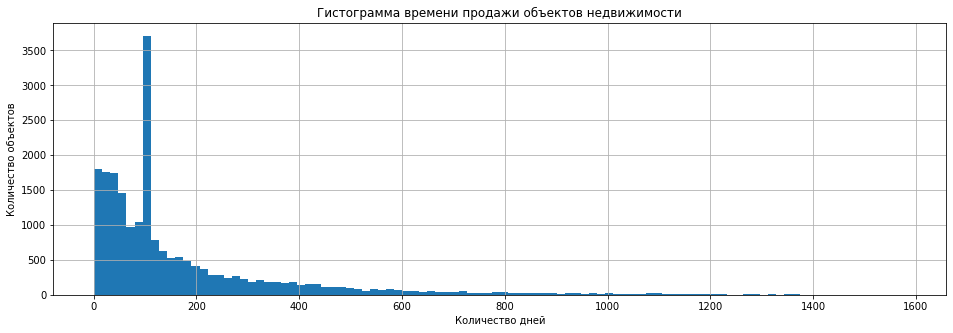

count    21051.000000
mean       173.612370
std        207.930831
min          1.000000
25%         48.000000
50%        102.000000
75%        204.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [25]:
# Построим гистограмму времени продажи квартиры
plt.figure(figsize=(16, 5))
plt.hist(df['days_exposition'], bins=100)
plt.title("Гистограмма времени продажи объектов недвижимости")
plt.xlabel('Количество дней')
plt.ylabel('Количество объектов')
plt.grid()
plt.show()

# Проверим среднее и медианное значение переменной
df['days_exposition'].describe() 

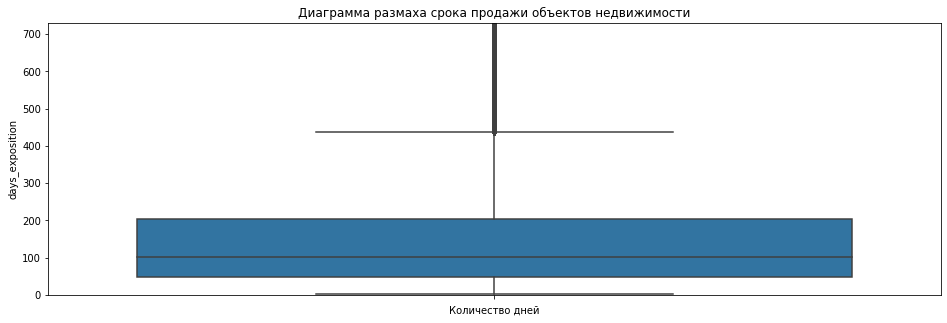

In [26]:
# Найдем среднее и медиану параметра при помощи построения диаграммы размаха, ограничившись 2 годами
plt.figure(figsize=(16, 5))
sns.boxplot(y = df['days_exposition'])
plt.title("Диаграмма размаха срока продажи объектов недвижимости")
plt.xlabel("Количество дней")
plt.ylim(0, 730)
plt.show()

Среднее время продажи квартиры - примерно 100 дней или около 3,5 месяцев. Срок продажи более 450 дней назад можно считать - необычно долгим.   

#### 4.3. Работа с аномальными значениями <a id='4.3.'></a> 

Обнаруженные ранее аномальные значения в данных не добавляют нам никакой практической ценности. В виду чего, на этом шаге исследования, избавимся от лишних данных.

In [27]:
# Избавимся от редких и выбивающихся значений 
df.drop(df.query('total_area > 120.0').index, inplace=True)
df.drop(df.query('last_price > 12000000').index, inplace=True)
df.drop(df.query('rooms >= 7').index, inplace=True)
df.drop(df.query('ceiling_height <= 2.2 or ceiling_height >= 3.5').index, inplace=True)
df.drop(df.query('days_exposition >450').index, inplace=True)

df.shape[0]

17416

Результатом удаления аномальных значений из структуры используемых данных стало сокращение количества строк рабочей таблицы.

#### 4.4. Факторы,  влияющие на стоимость квартиры <a id='4.4.'></a> 

Определим факторы, больше всего влияющие на стоимость квартиры. Проверим степень заисимости цены от площади квартиры, числа комнат, удаленности от центра и этажа (первый/последний/другой). 

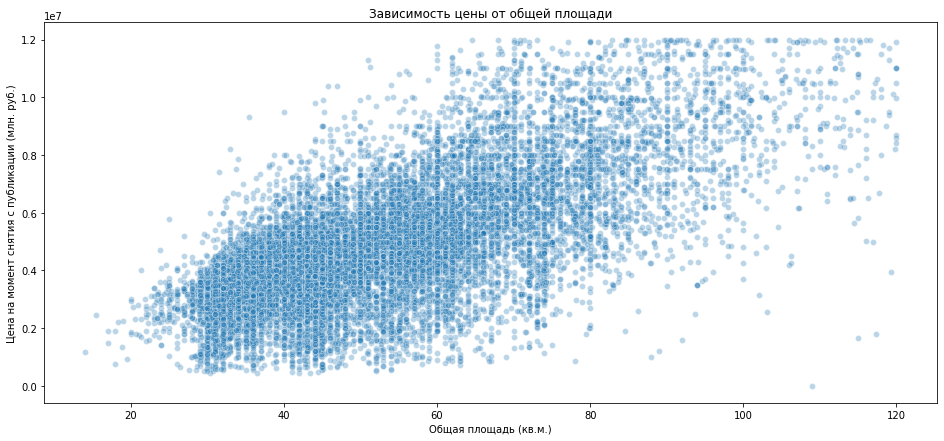

Показатель корреляции: 0.7


In [28]:
# Изучим зависимость цены от общей площади
plt.figure(figsize=(16, 7))
sns.scatterplot(x='total_area', y='last_price', data=df, alpha=.3)
plt.title("Зависимость цены от общей площади")
plt.xlabel('Общая площадь (кв.м.)')
plt.ylabel('Цена на момент снятия с публикации (млн. руб.)')
plt.show()

# Узнаем степень зависимости показателей
print('Показатель корреляции:', round(df['last_price'].corr(df['total_area']), 2)) 

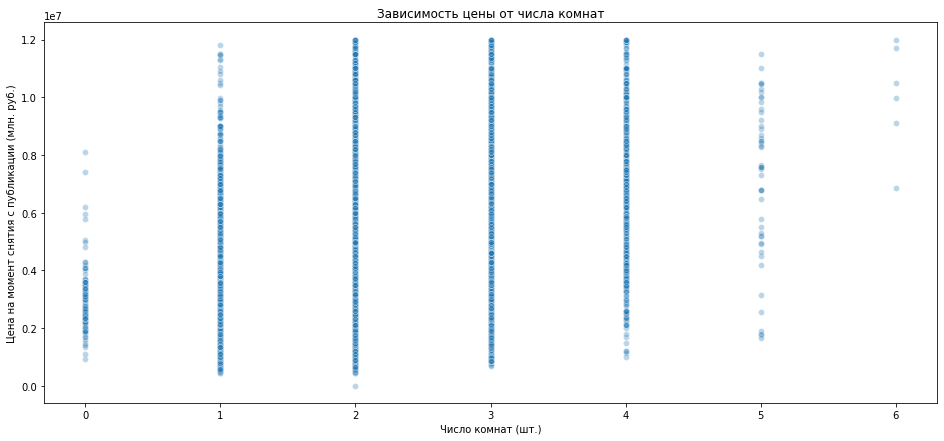

Показатель корреляции: 0.44


In [29]:
# Изучим зависимость цены недвижимости от числа комнат
plt.figure(figsize=(16, 7))
sns.scatterplot(x='rooms', y='last_price', data=df, alpha=.3)
plt.title('Зависимость цены от числа комнат')
plt.xlabel('Число комнат (шт.)')
plt.ylabel('Цена на момент снятия с публикации (млн. руб.)')
plt.show()

# Узнаем степень зависимости показателей
print('Показатель корреляции:', round(df['last_price'].corr(df['rooms']), 2)) 

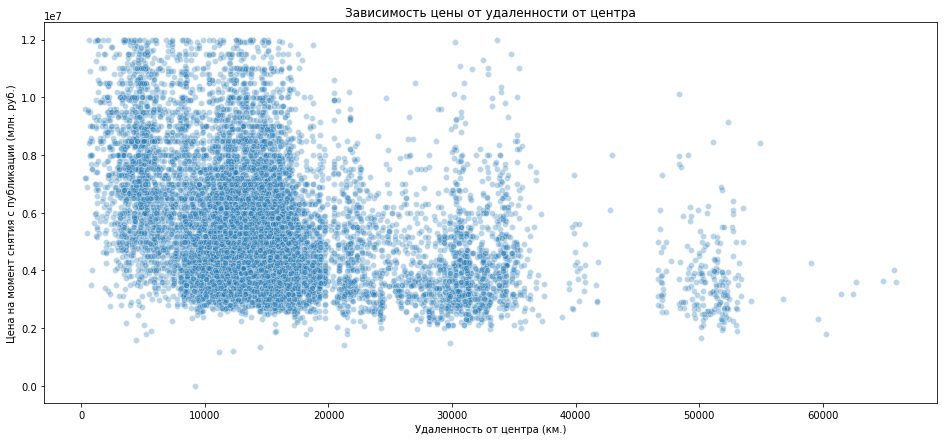

Показатель корреляции: -0.34


In [30]:
# Изучим зависимость цены недвижимости от удаленности от центра
plt.figure(figsize=(16, 7))
sns.scatterplot(x='cityCenters_nearest', y='last_price', data=df, alpha=.3)
plt.title('Зависимость цены от удаленности от центра')
plt.xlabel('Удаленность от центра (км.)')
plt.ylabel('Цена на момент снятия с публикации (млн. руб.)')
plt.show()

# Узнаем степень зависимости показателей
print('Показатель корреляции:', round(df['last_price'].corr(df['cityCenters_nearest']), 2)) 

In [31]:
# Изучим зависимость цены от того, на каком этаже расположена квартира
df.groupby('floor_status')['last_price'].agg(['median','count']).reset_index()

,floor_status,median,count
0,другой,4590000,12845
1,первый,3850000,2164
2,последний,4000000,2407


Фактором, оказывающим наиболее сильное влияние на стоимость квартиры является ее общая площадь. В данном случае мы можем наблюдать коэффециент корреляции равный - 0,7. 

Количество комнат также влияет на стоимость недвижимости, но коэффициент корреляции равный 0,4% говорит о том, что данная связь слабая, т.е. так бывает не всегда.

Также, можно отметить, что зависимость стоимости квартиры и ее удаленности от центра имеет отрицательный коэффициен (-0,3%), т.е. с увеличением расстояния от центра до объекта недвижимости мы будем наблюдать уменьшение ее стоимости.

Квартиры на первом или последнем этажах продаются сложнее, чем квартиры, расположенные на других этажах дома.

Теперь посмотрим более детально на зависимость стоимости квартиры от дня публикации, месяца, года, отобразив матрицу корреляции и построив матрицу рассеяния.

                    month_exposition  weekday_exposition  year_exposition
month_exposition            1.000000            0.018285        -0.275269
weekday_exposition          0.018285            1.000000        -0.018549
year_exposition            -0.275269           -0.018549         1.000000


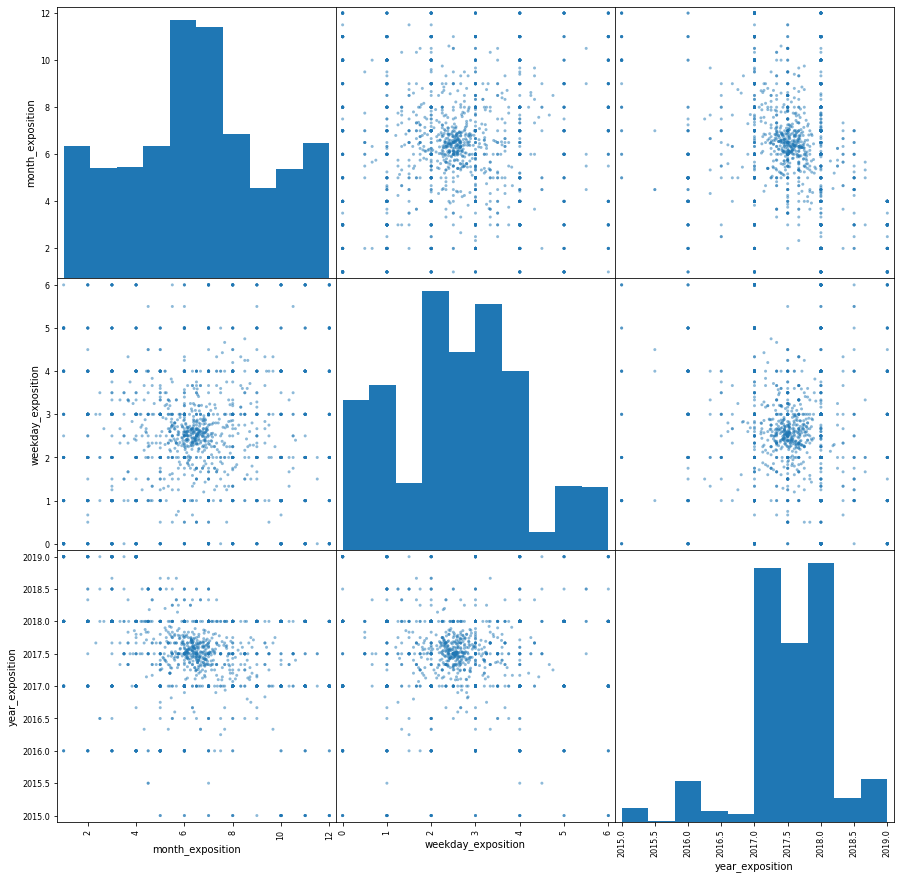

In [32]:
# Изучим зависимость цены на надвижимость от даты размещения объявления
exposition_corr = df.pivot_table(index='last_price',\
                                 values=['weekday_exposition', 'month_exposition', 'year_exposition'],\
                                 aggfunc='mean')

print(exposition_corr.corr())

pd.plotting.scatter_matrix(exposition_corr, figsize=(15, 15))
plt.show()

Сильной зависимости стоимости квартир от дня недели или месяца выявлено не было. Наиболее высокая цена на недвижимость наблюдалась в период с 2017 - по 2018 год.

#### 4.5. 10 населённых пунктов с наибольшим числом объявлений <a id='4.5.'></a> 

Найдем 10 населенных пунктов с наибольшим числом объявлений и рассчитаем для каждого из них среднюю стоимость квадратного метра. Затем определим лидеров по максимальной и минимальной стоимости за квадратны метр жилья.

In [33]:
# Посчитаем среднюю стоимость квадратного метра жилья в населенных пунтках с наибольшим количеством объявлений 
mean_price_per_sqm = df.groupby('locality_name')['sqm_price'].agg(['count','mean'])
mean_price_per_sqm.columns = ['count', 'mean']
mean_price_per_sqm.sort_values('count', ascending=False).reset_index().head(10)

,locality_name,count,mean
0,Санкт-Петербург,11202,105458.949205
1,посёлок Мурино,389,86326.349614
2,посёлок Шушары,367,78635.613079
3,Всеволожск,321,67419.333333
4,Колпино,298,74949.922819
5,Пушкин,274,100133.868613
6,посёлок Парголово,270,90327.107407
7,Гатчина,259,68771.660232
8,деревня Кудрово,201,92497.721393
9,Петергоф,165,83387.133333


Из показателей средней цены квадратного метра на жилье в Санкт-Петерурге и ближайших населённых пунктах можно сделать вывод, что максимального уровня этот показатель достигает в Санкт-Петербурге, городе Пушкин, деревне Кудрово, а также поселках Парголово и Мурино. Всеволжск и город Гатчин - лидеры по минимальной средней стоимости квадратного метра жилья.

Теперь посмотрим на предложения квартир по лидеру максимальной стоимости квадратного метра жилья и по количеству опубликованных объявлений - городу Санкт-Петербург: выясним какая область относится к центру города, рассчитаем среднюю стоимость каждого километра и определим зависимость цены от удаленности. 

In [34]:
# Приведем значения расстояния в км
df['cityCenters_km'] = df['cityCenters_nearest'] / 1000 

# Пропущенные значения заменим медианой
df.loc[df['cityCenters_km'].isna(), 'cityCenters_km'] = df['cityCenters_km'].median() 

# Приведем значния к целочисленному типу данных
df['cityCenters_km'] = df['cityCenters_km'].astype('int') 

# Проверим тип данных после замены
df['cityCenters_km'].dtypes 

# Выделим квартиры в Санкт-Петербурге
spb_df = df.query('locality_name == "Санкт-Петербург"') 

# Создадим сводную таблицу
spb_center_location = spb_df.pivot_table(index='cityCenters_km',\
                                         values=['sqm_price', 'last_price'],\
                                         aggfunc='median').\
                                         reset_index()  

# Выведем полученный результат
spb_center_location.head() 

,cityCenters_km,last_price,sqm_price
0,0,8200000,109102.0
1,1,8500000,113333.0
2,2,7865000,108202.0
3,3,7300000,103858.0
4,4,7500000,116842.0


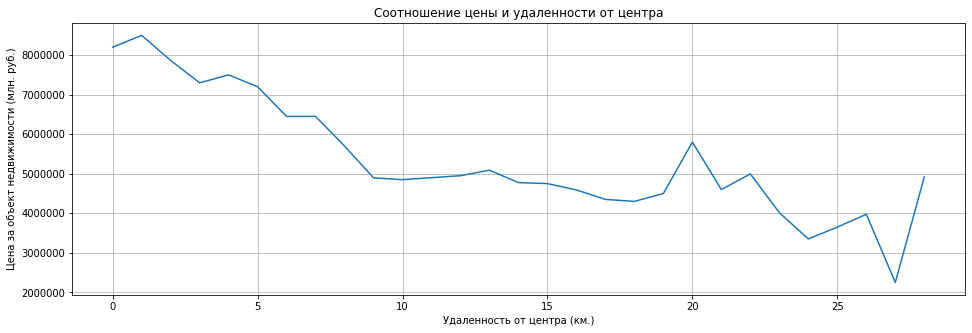

In [35]:
# Построим график зависимости от удаленности жилья от центра Санкт-Петербурга
plt.figure(figsize=(16, 5))
sns.lineplot(data=spb_center_location, x="cityCenters_km", y="last_price")
plt.title("Соотношение цены и удаленности от центра")
plt.ylabel('Цена за объект недвижимости (млн. руб.)')
plt.xlabel('Удаленность от центра (км.)')
plt.grid()
plt.show()

На данном шаге исследования было выявлено, что область, относящаяся к центру Санкт-Петербурга имеет радиус - 9 км.

#### 4.6. Анализ сегмента квартир в центре города <a id='4.6.'></a> 

Выделив сегмент квартир в центре Санкт-Петербурга, изучим следующие их параметры для нахождения наиболее встречающихся: общую площадь, цену, число комнат и высоту потолков. Для большей наглядности построим диаграммы размаха.

In [36]:
# Выделим сегмент квартир в центре Санкт-Петербурга
center_of_the_city = df.query('locality_name == "Санкт-Петербург" and cityCenters_km <= 9')

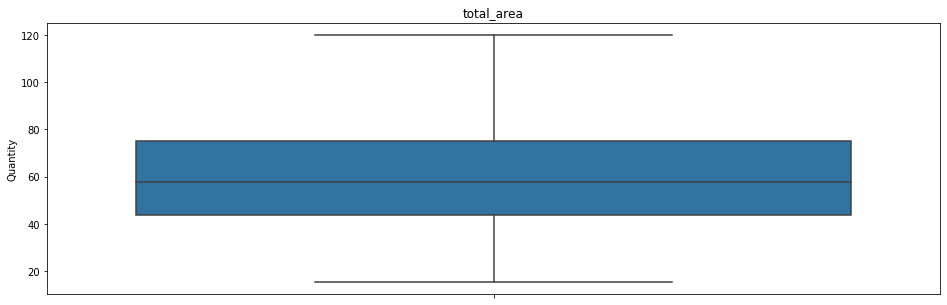

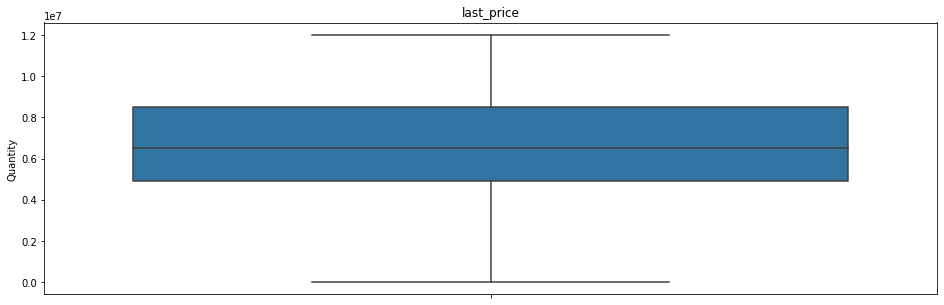

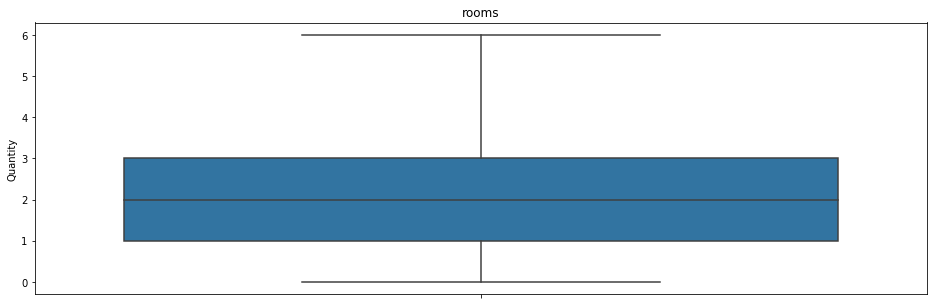

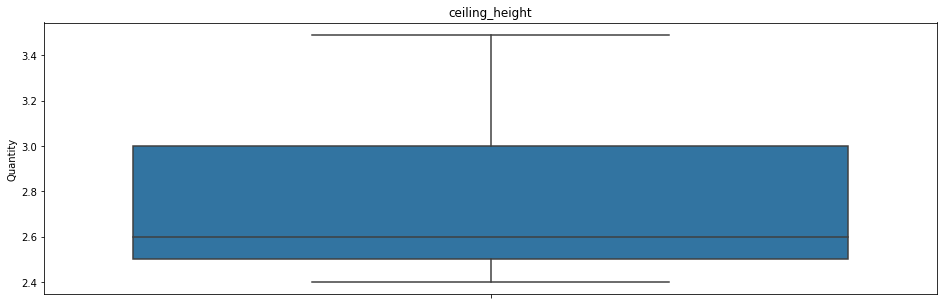

In [37]:
# Построим диаграммы размаха
for i in column_hist:
    plt.figure(figsize=(16, 5))
    sns.boxplot(y = center_of_the_city[i])
    plt.title(i)
    plt.ylabel('Quantity')
    plt.show()

В среднем в центре Санкт-Петербурга на продажу выставляют 2-комнатные квартиры, общей площадью - 60 кв.м., высотой потолков - 2,7 метра, по стоимости 7 млн. рублей. 

Финализируем наше исследование изучением ряда факторов, оказывающих влияние на стоимость квартир в центре города.

In [38]:
# Изучим зависимость ряда фактров на стоимость объектов недвижимости по выделенному сегменту
print('Влияние числа комнат на стоимость объекта недвижимости:', round(center_of_the_city['last_price'].\
                                                      corr(center_of_the_city['rooms']), 2))
print('Влияние этажа на стоимость объекта недвижимости:', round(center_of_the_city['last_price'].\
                                                      corr(center_of_the_city['floor']), 2))
print('Влияние удаленности о центра на стоимость объекта недвижимости:', round(center_of_the_city['last_price'].\
                                                      corr(center_of_the_city['cityCenters_km']), 2))
print('Влияние даты размещения объявления на стоимость объекта недвижимости:', round(center_of_the_city['last_price'].\
                                                      corr(center_of_the_city['days_exposition']), 2))

Влияние числа комнат на стоимость объекта недвижимости: 0.5
Влияние этажа на стоимость объекта недвижимости: 0.09
Влияние удаленности о центра на стоимость объекта недвижимости: -0.34
Влияние даты размещения объявления на стоимость объекта недвижимости: 0.1


Показателем, в наибольшей степени влияющим на стоимость квартир в центре - является число комнат (коэффициент корреляции - 0,5%), однако данную зависимость можно назвать - средней. Дата размещения объявления или этаж практически никак не влияет на стоимость недвижимости.

### Общий вывод <a id='5.'></a> 

В ходе исследования были изучены и преобработанны данные архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Были рассчитаны и добавлены в исходные данные следующие параметры, такие как: стоимость квадратного метра жилья, день недели/месяц/год даты публикации объявления, информация о первом/последнем или ином этажах, соотношение площадей: жилой и кухни к общей площади и расстояние до центра города в километрах, что помогло в дальнейшем проведению анализа.

На примере данных по всем населенным пунктам было изучено влияние площади квартир, цены, числа комнат, высоты потолков на стоимость жилья. Были обнаружены редкие и выбивающиеся значения из общей выборки. Был выявлен средний срок продажи квартиры и установлены характеристики для очень быстрых и необычно долгих продаж.

Были выделены 10 населенных пунктов с наибольшим количеством объявлений и среди них выявлены лидеры по максимальной и минимальной стоимости квадратного метра жилья. 

Лидером по количеству объявлений и стоимости квадратного метра жилья стал - Санкт-Петербург. Выделив область, которую можно считать центром города, было изучено влияние площади квартир, цены, числа комнат, высоты потолков и даты размещения объявления на стоимость. 

По итогу проведения исследования можно выделить ряд параметров, определяющих рыночную стоимость недвижимости и позволяющих построить автоматизированную систему для отслеживания аномалий: общая площадь не более 120 кв.м., расстрояние до центра города в пределах 9 км., количество комнат и этаж, на котором расположена квартира, а также высота потолков (однозначно, аномальной можно считать высоту, равную 1 или 100 метрам).

Также, стоит обращать внимание на срок публикации объявления - количество дней равное примерно календарному месяцу может указывать на сделку, совершенную в кратчайшие сроки и наличии мошеннической деятельности.